ARIMA Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
airline = pd.read_csv(r"C:\Users\User\Downloads\AirPassengers - AirPassengers.csv",index_col='Month',parse_dates=True)

In [11]:
airline

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


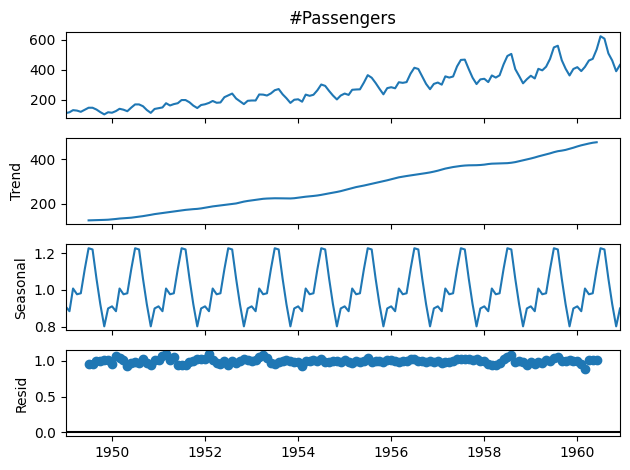

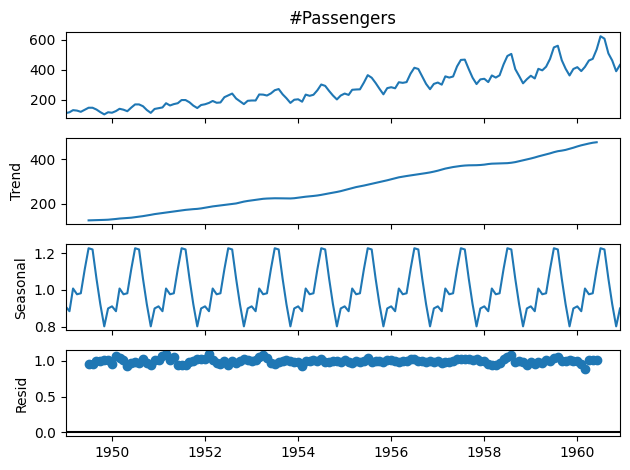

In [3]:
result = seasonal_decompose(airline['#Passengers'], model ='multiplicative')                #model ='multiplicative' type of seasonal component ex. additive
result.plot()

In [4]:
train = airline.iloc[:len(airline)-12]              #begin - before last 12 months
test = airline.iloc[len(airline)-12:]               #last 12 months

In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['#Passengers'], order=(0,1,1), seasonal_order=(2,1,1,12))             #coeff of p d q >> find optimal
result = model.fit()
result.summary()


c:\Users\User\Desktop\test\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\User\Desktop\test\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  132
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -443.014
Date:                            Fri, 17 Jan 2025   AIC                            896.027
Time:                                    14:26:40   BIC                            909.923
Sample:                                01-01-1949   HQIC                           901.670
                                     - 12-01-1959                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2983      0.077     -3.878      0.000      -0.449      -0.148
ar.S.L12       0.7096      0.227      3.126      0.002       0.265       1.154
ar.S.L24       0.2895      0.100      2.900      0.004       0.094       0.485
ma.S.L12      -0.9797      2.120     -0.462      0.644      -5.134       3.175
sigma2        88.3598    169.407      0.522      0.602    -243.672     420.392
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.85   Prob(JB):                         1.00
Heteroskedasticity (H):               1.62   Skew:                            -0.00
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

c:\Users\User\Desktop\test\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Month'>

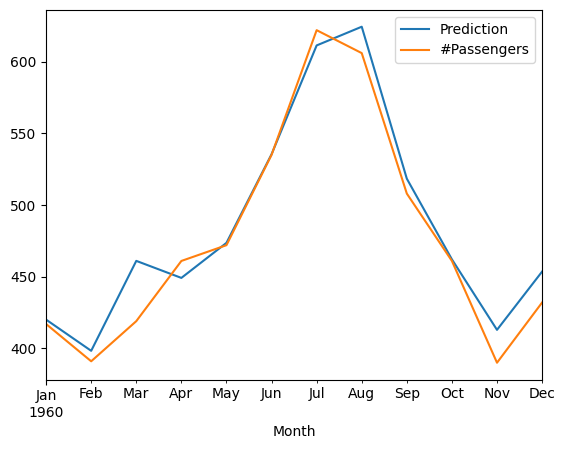

In [6]:
start = len(train)
end = len(train) + len(test) - 1
prediction = result.predict(start, end, typ = 'levels').rename("Prediction")
prediction.plot(legend = True)
test['#Passengers'].plot(legend = True)

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(test['#Passengers'],prediction)
mse = mean_squared_error(test['#Passengers'],prediction)
rmse = np.sqrt(mse)

print(" R2 = ",r2)
print(" MSE = ",mse)
print(" RMSE = ",rmse)

 R2 =  0.9469391580428874
 MSE =  293.92906010914857
 RMSE =  17.14435942545386


In [9]:
forecast = result.predict(start = len(airline), end =(len(airline)-1)+3*12, typ ='levels').rename('forecast')

c:\Users\User\Desktop\test\.venv\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Month'>

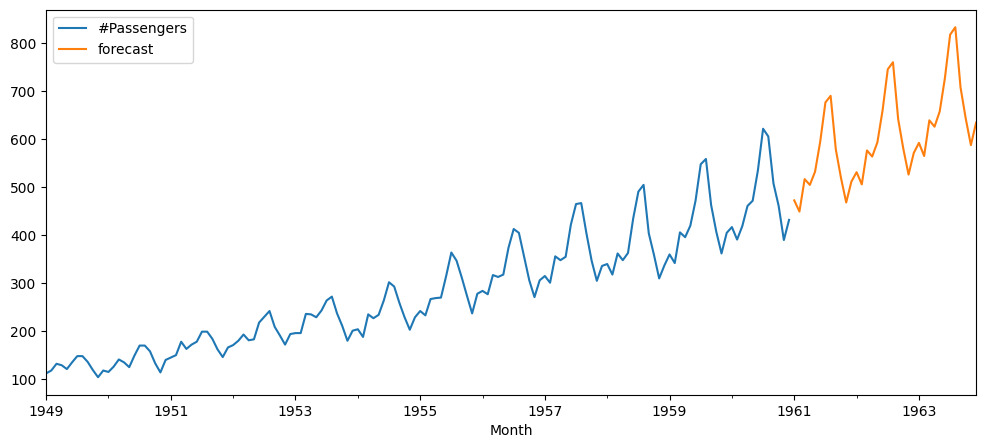

In [10]:
airline['#Passengers'].plot(figsize=(12,5), legend=True)
forecast.plot(legend=True)